In [10]:
#Loading Necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import plotly.express as px
import pandas as pd
import geopandas as gp
import contextily as cx
from pysal.viz import splot
from splot.esda import plot_moran
from pysal.lib import weights
from pysal.explore import esda
import warnings
warnings.filterwarnings('ignore')

- Loading Dataset


In [3]:
global_temp_country = pd.read_csv('DataSet/GlobalLandTemperaturesByCity.csv')

In [4]:
global_temp_country.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E


# Data Cleaning on global climate change data

- Cleaning Missing Values

In [5]:
print("Total Missing Values:\n",  global_temp_country.isna().sum())

Total Missing Values:
 dt                                    0
AverageTemperature               364130
AverageTemperatureUncertainty    364130
City                                  0
Country                               0
Latitude                              0
Longitude                             0
dtype: int64


In [6]:
global_temp_country.dropna(axis='index',how='any',subset=['AverageTemperature'],inplace=True)

In [7]:
print("Total Missing Values:\n",  global_temp_country.isna().sum())

Total Missing Values:
 dt                               0
AverageTemperature               0
AverageTemperatureUncertainty    0
City                             0
Country                          0
Latitude                         0
Longitude                        0
dtype: int64


- Adjusting the country names

In [9]:
global_temp_country['Country'].unique()

array(['Denmark', 'Turkey', 'Kazakhstan', 'China', 'Spain', 'Germany',
       'Nigeria', 'Iran', 'Russia', 'Canada', "Côte D'Ivoire",
       'United Kingdom', 'Saudi Arabia', 'Japan', 'United States',
       'India', 'Benin', 'United Arab Emirates', 'Mexico', 'Venezuela',
       'Ghana', 'Ethiopia', 'Australia', 'Yemen', 'Indonesia', 'Morocco',
       'Pakistan', 'France', 'Libya', 'Burma', 'Brazil', 'South Africa',
       'Syria', 'Egypt', 'Algeria', 'Netherlands', 'Malaysia', 'Portugal',
       'Ecuador', 'Italy', 'Uzbekistan', 'Philippines', 'Madagascar',
       'Chile', 'Belgium', 'El Salvador', 'Romania', 'Peru', 'Colombia',
       'Tanzania', 'Tunisia', 'Turkmenistan', 'Israel', 'Eritrea',
       'Paraguay', 'Greece', 'New Zealand', 'Vietnam', 'Cameroon', 'Iraq',
       'Afghanistan', 'Argentina', 'Azerbaijan', 'Moldova', 'Mali',
       'Congo (Democratic Republic Of The)', 'Thailand',
       'Central African Republic', 'Bosnia And Herzegovina', 'Bangladesh',
       'Switzerland'

In [10]:
dict={
    "Congo (Democratic Republic Of The)" :"Congo",
    "Czech Republic " : "Czech"
}

In [11]:
global_temp_country['Country'].replace(dict,inplace=True)

# Let's Calculate average temperature for each country

- Taking Mean of temperature of each country as a whole

In [12]:
avg_temp=global_temp_country.groupby(['Country'])['AverageTemperature'].mean().to_frame().reset_index()

In [13]:
#Checking
avg_temp.head()

,Country,AverageTemperature
0,Afghanistan,13.816497
1,Albania,15.525828
2,Algeria,17.763206
3,Angola,21.759716
4,Argentina,16.999216


### Plotting the Average Temperature of the world (1800-2013)

In [203]:
fig=px.choropleth(avg_temp,locations='Country',locationmode='country names',color='AverageTemperature')
fig.update_layout(title='Choropleth map of average temperature of World')
fig.show()

## Plotting Bar Plot on the Top 20 most Warm Countries

<AxesSubplot: xlabel='AverageTemperature', ylabel='Country'>

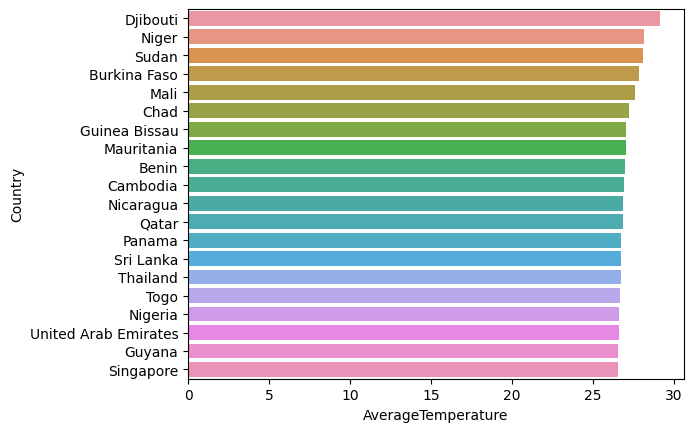

In [15]:
sns.barplot(x=avg_temp.sort_values(by='AverageTemperature',ascending=False)['AverageTemperature'][0:20],y=avg_temp.sort_values(by='AverageTemperature',ascending=False)['Country'][0:20])

# Is there global warming? 

Now as we have seen the temperatures of the different countries, its the time to analyse whether global warming occured or not !

- Loading Average Temperature Dataset 

In [4]:
global_temp=pd.read_csv('DataSet/GlobalTemperatures.csv')

In [17]:
global_temp.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


- Extracting years out of 'dt' attribute

In [18]:
global_temp['dt'][0].split('-')[0]

'1750'

In [19]:
def fetch_year(date):
    return date.split('-')[0]

In [20]:
global_temp['years']=global_temp['dt'].apply(fetch_year)

- Creating another column that will contain the extracted years

In [21]:
global_temp.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty,years
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN,1750
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN,1750
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN,1750
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN,1750
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN,1750


- Keeping only required columns

In [22]:
global_temp.groupby('years').agg({'LandAverageTemperature':'mean','LandAverageTemperatureUncertainty':'mean'})

,LandAverageTemperature,LandAverageTemperatureUncertainty
years,,
1750,8.719364,2.637818
1751,7.976143,2.781143
1752,5.779833,2.977000
1753,8.388083,3.176000
1754,8.469333,3.494250
...,...,...
2011,9.516000,0.082000
2012,9.507333,0.083417
2013,9.606500,0.097667


In [23]:
data = global_temp.groupby('years').agg({'LandAverageTemperature': 'mean'}).reset_index()

In [24]:
#Checking the columns after grouping by 
data.columns

Index(['years', 'LandAverageTemperature'], dtype='object')

- Keeping Years to show trend

In [25]:
data['years'] = data['years'].astype(int)
temp_avg_1990 = data[data['years'] >=1907]

### Showing Trend of Rise in Temperature in the world

In [26]:
fig=px.line(temp_avg_1990,x='years',y=['LandAverageTemperature'],title='Average Land Temperature in World (1907-2015)')
fig.show()

#USA= USA.drop(index= [498,499])

# Biggest Emittor of Carbon Fossils

- Reading CO2 Emissions Dataset


In [6]:
carbon_emissions_read = pd.read_csv("DataSet/annual-co2-emissions-per-country.csv")

- Keeping Desired Columns


In [247]:
carbon_emissions_read = carbon_emissions_read[["Entity", "Year","Annual CO₂ emissions"]]

In [ ]:
carbon_emissions_read.head()

- Cleaning to get country data

In [248]:
attributes_to_remove = ['World', 'OECD (GCP)', 'Non-OECD (GCP)', 'High-income countries', 'Europe (GCP)', 'North America (GCP)', 'Asia (GCP)', 'Europe', "European Union" ,"Upper-middle-income countries","Asia" ,"European Union (27) (GCP)", "European Union (28)", "Europe (excl. EU-27)", "United States"]
country_carbon_emission = carbon_emissions_read[~carbon_emissions_read['Entity'].isin(attributes_to_remove)]

In [287]:
country_carbon_emission.head(10)

,Entity,Year,Annual CO₂ emissions
0,Afghanistan,1949,14656.0
1,Afghanistan,1950,84272.0
2,Afghanistan,1951,91600.0
3,Afghanistan,1952,91600.0
4,Afghanistan,1953,106256.0
5,Afghanistan,1954,106256.0
6,Afghanistan,1955,153888.0
7,Afghanistan,1956,183200.0
8,Afghanistan,1957,293120.0
9,Afghanistan,1958,329760.0


- Grouping the data by country and sum the CO₂ emissions for each year


In [288]:
top_country_carbon_emission = country_carbon_emission.groupby(['Entity', 'Year'])['Annual CO₂ emissions'].sum().reset_index()

- Sorting the countries in descending order based on their total emissions


In [220]:
top_country_carbon_emission = top_country_carbon_emission.groupby('Entity')['Annual CO₂ emissions'].sum().sort_values(ascending=False)

['North America', 'United States', 'European Union (27)']

In [225]:
top_country_carbon_emission.head(10)

Entity
North America                   4.842147e+11
United States                   4.219069e+11
European Union (27)             2.931916e+11
Asia (excl. China and India)    2.511383e+11
China                           2.493528e+11
                                    ...     
Niue                            3.019870e+05
Tuvalu                          2.868180e+05
Puerto Rico                     2.088480e+05
Leeward Islands (GCP)           1.795360e+05
Antarctica                      1.538880e+05
Name: Annual CO₂ emissions, Length: 245, dtype: float64

- Keeping the Top 3 Contributors

In [270]:
attributes_remain =['United States', 'China', 'Russia'] 
country_carbon_3= carbon_emissions_read[carbon_emissions_read['Entity'].isin(attributes_remain)]

- Selecting year range (1900-2000)

In [273]:
country_carbon_3 = country_carbon_3[(country_carbon_3['Year'] > 1900) & (country_carbon_3['Year'] <= 2000)]

- Plotting the Top 3 Carbon contributors

In [274]:
fig=px.line(country_carbon_3,x='Year',y=['Annual CO₂ emissions'],color='Entity',title='Carbon Emissions of Top 3 Countries(1900-2000)')
fig.show()

As USA is the biggest contributor, so we analyse USA

## Let's Analyse Trend in Temperature for the USA, India and Pakistan

Now, we have found out that Global warming is increasing day by day, lets analayse the biggest contributor and the affected countries

- Keeping the contributor (USA) and affected countries (India, Pakistan)

In [27]:
global_warm_countries = ['Pakistan', 'United States', 'India']

In [28]:
global_temp_country.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
5,1744-04-01,5.788,3.624,Århus,Denmark,57.05N,10.33E
6,1744-05-01,10.644,1.283,Århus,Denmark,57.05N,10.33E
7,1744-06-01,14.051,1.347,Århus,Denmark,57.05N,10.33E
8,1744-07-01,16.082,1.396,Århus,Denmark,57.05N,10.33E


In [29]:
global_warm_countries=global_temp_country[global_temp_country['Country'].isin(global_warm_countries)]

In [30]:
global_warm_countries.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
47555,1820-01-01,2.101,3.217,Abilene,United States,32.95N,100.53W
47556,1820-02-01,6.926,2.853,Abilene,United States,32.95N,100.53W
47557,1820-03-01,10.767,2.395,Abilene,United States,32.95N,100.53W
47558,1820-04-01,17.989,2.202,Abilene,United States,32.95N,100.53W
47559,1820-05-01,21.809,2.036,Abilene,United States,32.95N,100.53W


In [31]:
global_warm_countries.shape

(1745337, 7)

In [32]:
global_warm_countries['years']=global_warm_countries['dt'].apply(fetch_year)

In [33]:
global_warm_countries.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,years
47555,1820-01-01,2.101,3.217,Abilene,United States,32.95N,100.53W,1820
47556,1820-02-01,6.926,2.853,Abilene,United States,32.95N,100.53W,1820
47557,1820-03-01,10.767,2.395,Abilene,United States,32.95N,100.53W,1820
47558,1820-04-01,17.989,2.202,Abilene,United States,32.95N,100.53W,1820
47559,1820-05-01,21.809,2.036,Abilene,United States,32.95N,100.53W,1820


In [34]:
global_warm_countries['years'] = global_warm_countries['years'].astype(int)

In [35]:
avg_temp_global_countries=global_warm_countries.groupby(['years','Country']).agg({'AverageTemperature':'mean'}).reset_index()
avg_temp_global_countries.head()

,years,Country,AverageTemperature
0,1743,United States,5.818071
1,1744,United States,13.858205
2,1745,United States,4.039120
3,1750,United States,12.456202
4,1751,United States,13.140726


In [36]:
avg_PK_US_IND_1870_1950 = avg_temp_global_countries[(avg_temp_global_countries['years'] >=1870) & (avg_temp_global_countries['years'] <1950)]
avg_PK_US_IND_1950_2013 = avg_temp_global_countries[(avg_temp_global_countries['years'] >=1950) & (avg_temp_global_countries['years'] <2013)]


In [37]:
fig=px.line(avg_PK_US_IND_1870_1950,x='years',y=['AverageTemperature'],color='Country',title='Average Temperature of USA, India and Pakistan (1870-1950)')
fig.show()

In [38]:
fig=px.line(avg_PK_US_IND_1950_2013,x='years',y=['AverageTemperature'],color='Country',title='Average Temperature of USA, India and Pakistan (1950-2013)')
fig.show()

- As we can see that, the rise after 1950 is drastic in the temperatures, as the rise of Carbon Emissions are on the peak from 1950, growing per year

- From the charts we can see, that there is global warming nowadays. The average temperature of Earth surface in increasing at a very rapid speed. The fastest temperature growth occurred in the last 30 years. This is really alarming. We need to switch to ecological sources of energy, that will reduce CO2. 
If we donot take Global Warming seriously, we will be facing alot of disasterers like we are facing nowadays. 

## USA Analysis

In [7]:
global_temp_state=pd.read_csv('DataSet/GlobalLandTemperaturesByState.csv')

In [ ]:
global_temp_state.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,State,Country
0,1855-05-01,25.544,1.171,Acre,Brazil
1,1855-06-01,24.228,1.103,Acre,Brazil
2,1855-07-01,24.371,1.044,Acre,Brazil
3,1855-08-01,25.427,1.073,Acre,Brazil
4,1855-09-01,25.675,1.014,Acre,Brazil


- Keeping USA Country Data

In [ ]:
filter=global_temp_state['Country']=='United States'
USA=global_temp_state[filter]

In [ ]:
USA.dropna(inplace=True)

In [ ]:
USA['State'].unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District Of Columbia',
       'Florida', 'Georgia (State)', 'Hawaii', 'Idaho', 'Illinois',
       'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine',
       'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

In [ ]:
state={'Georgia (State)':'Georgia','District Of Columbia':'Columbia'}
USA['State'].replace(state,inplace=True)

In [ ]:
USA['years']=USA['dt'].apply(fetch_year)


In [ ]:
USA=USA[['years','State','AverageTemperature']]

In [ ]:
USA.head()

,years,State,AverageTemperature
7458,1743,Alabama,10.722
7463,1744,Alabama,19.075
7464,1744,Alabama,21.197
7465,1744,Alabama,25.290
7466,1744,Alabama,26.420


- Computing the Avg temp for US cities by year and city, also generating a new DataFrame with the aggregated data

In [ ]:
# usa_avg_temp=USA.groupby('State')['AverageTemperature'].mean().reset_index()

In [ ]:
usa_avg_temp = USA.groupby(['years', 'State']).agg({'AverageTemperature':'mean'}).reset_index()

In [ ]:
# usa_avg_temp = usa_temp.groupby(['years', 'City']).agg({'AverageTemperature':'mean'}).reset_index()


In [ ]:
# usa_avg_temp.head()

- Reading USA ShapeFile

In [ ]:
usa_shape_file = gp.read_file("USA_Counties/USA_Counties.shp")

In [ ]:
usa_shape_file.head()

,NAME,STATE_NAME,POP2010,POP10_SQMI,POP2012,POP12_SQMI,WHITE,BLACK,AMERI_ES,ASIAN,...,HSE_UNITS,VACANT,OWNER_OCC,RENTER_OCC,NO_FARMS07,AVG_SIZE07,CROP_ACR07,AVG_SALE07,SQMI,geometry
0,Graham,Arizona,37220,8.0,37745,8.132560,26827,683,5376,200,...,12980,1860,8089,3031,343.0,3923.0,35251.0,-99.00,4641.22,"MULTIPOLYGON (((-12217131.319 3959728.262, -12..."
1,Greenlee,Arizona,8437,4.6,8962,4.848649,6514,89,195,46,...,4372,1184,1593,1595,127.0,278.0,6687.0,48.90,1848.35,"POLYGON ((-12139871.371 3999069.283, -12139050..."
2,Bureau,Illinois,34978,40.1,35095,40.185728,32937,212,98,228,...,15720,1458,10845,3417,1189.0,402.0,439887.0,255.14,873.32,"POLYGON ((-9925971.867 5099065.657, -9925971.4..."
3,La Paz,Arizona,20489,4.5,20586,4.561297,14306,129,2628,107,...,16049,6851,7072,2126,99.0,-99.0,123314.0,1379.73,4513.19,"MULTIPOLYGON (((-12720330.271 3924275.838, -12..."
4,Calhoun,Illinois,5089,17.9,5109,18.010364,5032,7,9,12,...,2835,750,1681,404,464.0,190.0,49579.0,40.22,283.67,"POLYGON ((-10116327.032 4779103.377, -10116308..."


- Adjusting the Shapefile

In [ ]:
usa_shape_file= usa_shape_file.to_crs('EPSG:4276')
usa_shape_file['longitude']=  usa_shape_file.geometry.centroid.x
usa_shape_file['latitude']= usa_shape_file.geometry.centroid.y

In [ ]:
usa_shape_file.head()

,NAME,STATE_NAME,POP2010,POP10_SQMI,POP2012,POP12_SQMI,WHITE,BLACK,AMERI_ES,ASIAN,...,OWNER_OCC,RENTER_OCC,NO_FARMS07,AVG_SIZE07,CROP_ACR07,AVG_SALE07,SQMI,geometry,longitude,latitude
0,Graham,Arizona,37220,8.0,37745,8.132560,26827,683,5376,200,...,8089,3031,343.0,3923.0,35251.0,-99.00,4641.22,"MULTIPOLYGON (((-109.74836 33.48403, -109.7487...",-109.887439,32.932729
1,Greenlee,Arizona,8437,4.6,8962,4.848649,6514,89,195,46,...,1593,1595,127.0,278.0,6687.0,48.90,1848.35,"POLYGON ((-109.05432 33.77828, -109.04694 33.7...",-109.240092,33.215339
2,Bureau,Illinois,34978,40.1,35095,40.185728,32937,212,98,228,...,10845,3417,1189.0,402.0,439887.0,255.14,873.32,"POLYGON ((-89.16652 41.58534, -89.16652 41.585...",-89.528677,41.404103
3,La Paz,Arizona,20489,4.5,20586,4.561297,14306,129,2628,107,...,7072,2126,99.0,-99.0,123314.0,1379.73,4513.19,"MULTIPOLYGON (((-114.26867 33.21800, -114.2683...",-113.981292,33.729285
4,Calhoun,Illinois,5089,17.9,5109,18.010364,5032,7,9,12,...,1681,404,464.0,190.0,49579.0,40.22,283.67,"POLYGON ((-90.87651 39.39981, -90.87635 39.399...",-90.667472,39.169178


- Trying to identify the out of bound values of the shape file

In [ ]:

from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent='my_application')

# define the bounding box of the United States
us_bounds = {'north': 49.3457868, 'east': -66.9498955, 'south': 24.7433195, 'west': -124.7844079}

# loop through the data points and check if they are outside of the bounding box
out_of_bounds = []
for i, row in usa_shape_file.iterrows():
    location = geolocator.reverse(f"{row['latitude']}, {row['longitude']}")
    if (location.latitude > us_bounds['north'] or location.latitude < us_bounds['south'] or
        location.longitude > us_bounds['east'] or location.longitude < us_bounds['west']):
        out_of_bounds.append(i)

# print the indices of the out of bounds data points
print(out_of_bounds)
#usa_shape_file= usa_shape_file.drop(index= out_of_bounds)

- Before removing out of bound values

<AxesSubplot: >

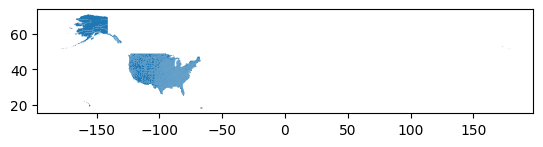

In [ ]:
usa_shape_file.plot()

In [ ]:
out_of_bounds= [198, 234, 247, 261, 323, 346, 381, 400, 411, 423, 426, 445, 454, 462, 476, 482, 494, 514, 533, 544, 556, 571, 614, 638, 645, 669, 679, 683, 690, 710, 725, 733, 744, 753, 3060, 3062, 3063, 3065, 3067, 3069, 3071, 3072, 3074, 3076, 3078, 3081, 3083, 3086, 3088, 3090, 3092, 3094, 3096, 3098, 3100, 3102, 3103, 3105, 3107, 3109, 3110, 3112, 3114, 3118, 3121, 3123, 3125, 3127, 3128, 3129, 3130, 3132, 3133, 3136, 3139, 3142, 3144, 3146, 3149, 3150, 3152, 3155, 3157, 3159, 3162, 3164, 3167, 3168, 3171, 3173, 3176, 3178, 3180, 3182, 3184, 3187, 3190, 3193, 3197, 3201, 3204, 3206, 3209, 3211, 3212, 3214, 3215, 3216, 3217, 3218, 3219, 3220]
usa_shape_file= usa_shape_file.drop(index= out_of_bounds)

- After removing out of bound values

<AxesSubplot: >

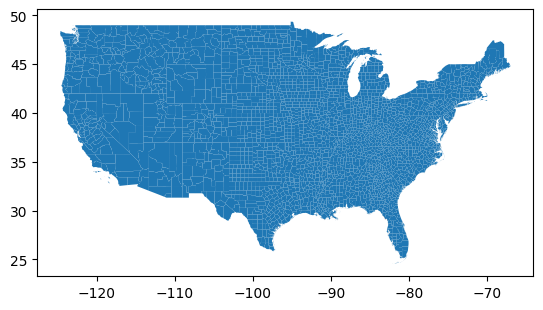

In [ ]:
usa_shape_file.plot()

In [ ]:
usa_shape_file["STATE_NAME"].unique()

array(['Arizona', 'Illinois', 'Alabama', 'Georgia', 'Arkansas',
       'California', 'Indiana', 'Idaho', 'Colorado', 'Iowa',
       'Connecticut', 'Delaware', 'District of Columbia', 'Florida',
       'Kansas', 'Kentucky', 'Missouri', 'Louisiana', 'Montana',
       'Maryland', 'Nebraska', 'Nevada', 'North Carolina',
       'New Hampshire', 'New Jersey', 'Massachusetts', 'Minnesota',
       'Maine', 'Mississippi', 'New Mexico', 'Michigan', 'New York',
       'North Dakota', 'Ohio', 'Tennessee', 'Texas', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'South Dakota', 'Rhode Island', 'South Carolina',
       'Utah', 'Virginia', 'Vermont', 'Washington', 'West Virginia',
       'Wisconsin', 'Wyoming'], dtype=object)

In [ ]:
print(len(usa_avg_temp["State"].unique()))

51


- Adjusting the cities from shape file and dataset

In [ ]:
district_boundaries_usa = usa_shape_file[["STATE_NAME", "geometry"]]
district_boundaries_usa = district_boundaries_usa.rename(columns={"STATE_NAME": "State"})
district_boundaries_usa = district_boundaries_usa.loc[(district_boundaries_usa["State"].isin(usa_avg_temp["State"].unique()))]

- Merging to make one dataset

In [ ]:
usa_geoms = usa_avg_temp.merge(district_boundaries_usa, on=["State"], how = "right")
usa_geoms = gp.GeoDataFrame(usa_geoms, geometry = usa_geoms["geometry"])

In [ ]:
usa_geoms

,years,State,AverageTemperature,geometry
0,1835,Arizona,13.877917,"MULTIPOLYGON (((-109.74836 33.48403, -109.7487..."
1,1836,Arizona,14.261750,"MULTIPOLYGON (((-109.74836 33.48403, -109.7487..."
2,1837,Arizona,14.404417,"MULTIPOLYGON (((-109.74836 33.48403, -109.7487..."
3,1838,Arizona,14.165917,"MULTIPOLYGON (((-109.74836 33.48403, -109.7487..."
4,1839,Arizona,14.724250,"MULTIPOLYGON (((-109.74836 33.48403, -109.7487..."
...,...,...,...,...
749536,2009,Wisconsin,6.204667,"POLYGON ((-90.31220 43.72871, -90.31223 43.725..."
749537,2010,Wisconsin,7.869250,"POLYGON ((-90.31220 43.72871, -90.31223 43.725..."
749538,2011,Wisconsin,7.191167,"POLYGON ((-90.31220 43.72871, -90.31223 43.725..."
749539,2012,Wisconsin,8.959167,"POLYGON ((-90.31220 43.72871, -90.31223 43.725..."


In [ ]:
type(usa_geoms["years"])

pandas.core.series.Series

In [ ]:
usa_geoms['years'] = usa_geoms['years'].astype(int)

In [ ]:
# - This function filters the geodataframe for the given year, 
# - creates a new GeoDataFrame with the resulting data, and returns it.

def _change_year(year,geoms):
    data = geoms.loc[(geoms['years'] == year)]
    data.drop_duplicates()
    data = gp.GeoDataFrame(data , geometry = geoms['geometry'])
    return data


In [ ]:
# - This function selects the temperature data for a given range of years,
# - returns a new GeoDataFrame containing the selected data.

def change_years_range(st,end,geoms):
    data = geoms.loc[(geoms['years'] >= st) & (geoms['years'] < end)]
    # data = data.merge(district_boundaries_pk, on = "City", how="left")
    data.drop_duplicates()
    data = gp.GeoDataFrame(data , geometry = geoms['geometry'])
    return data

- Selecting years range for plotting

In [ ]:
usa_avg_temp_1900_1940 = change_years_range(1900,1940,usa_geoms) 
usa_avg_temp_1941_1970 = change_years_range(1941,1970,usa_geoms)
usa_avg_temp_1971_2000 = change_years_range(1971,2000,usa_geoms)
usa_avg_temp_2001_2013 = change_years_range(2001,2013,usa_geoms) 

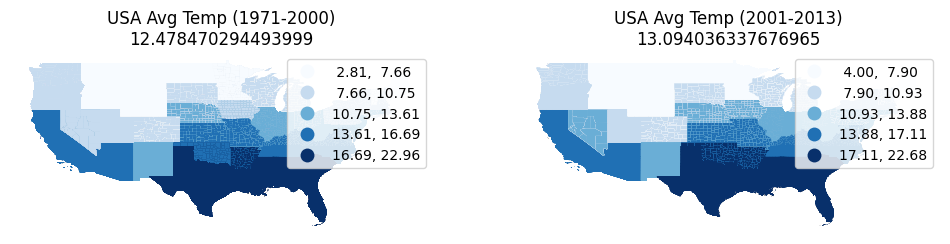

In [ ]:
f, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 10))
plots = [(usa_avg_temp_1971_2000, ax[0]), (usa_avg_temp_2001_2013, ax[1])]
i = 1
for plot, axis in plots:
    plot.plot(ax=axis, column="AverageTemperature", cmap="Blues", scheme="FisherJenks", k=5, legend=True)
    mean = plot['AverageTemperature'].mean()
    if i == 1:
        annotation_text = "USA Avg Temp (1971-2000)\n" + str(mean) 
    elif i == 2:
        annotation_text = "USA Avg Temp (2001-2013)\n" + str(mean) 
    i += 1
    axis.set_title(annotation_text, fontsize=12)
    axis.set_axis_off()
    axis.set_aspect('equal')


- Plotting for USA Temp

- Finding out Auto Co-relation

In [ ]:
# Generate W from the GeoDataFrame
w = weights.KNN.from_dataframe(usa_avg_temp_2001_2013, k=4)
# Row-standardization
w.transform = "R"

usa_avg_temp_2001_2013["AverageTemperatureLag"] = weights.spatial_lag.lag_spatial(
    w, usa_avg_temp_2001_2013["AverageTemperature"]
)

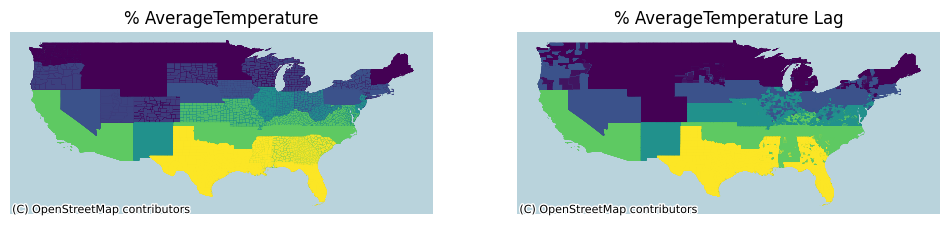

In [ ]:
f, axs = plt.subplots(1, 2, figsize=(12, 6))
ax1, ax2 = axs
usa_avg_temp_2001_2013.plot(
    column="AverageTemperature",
    cmap="viridis",
    scheme="quantiles",
    k=5,
    edgecolor="white",
    linewidth=0.0,
    alpha=0.75,
    # legend=True,
    ax=ax1,
)
ax1.set_axis_off()
ax1.set_title("% AverageTemperature")
cx.add_basemap(ax1, source=cx.providers.OpenStreetMap.DE)


usa_avg_temp_2001_2013.plot(
    column="AverageTemperatureLag",
    cmap="viridis",
    scheme="quantiles",
    k=5,
    edgecolor="white",
    linewidth=0.0,
    alpha=0.75,
    # legend=True,
    ax=ax2,
)
ax2.set_axis_off()
ax2.set_title("% AverageTemperature Lag")
cx.add_basemap(ax2, source=cx.providers.OpenStreetMap.DE)
plt.show()

In [ ]:
from pysal.explore import esda

w.transform = "R"
moran = esda.moran.Moran(usa_avg_temp_2001_2013["AverageTemperature"], w)
print("USA Score: ",moran.I)

USA Score:  0.9821732562133438


# Global Warming affected countries

## Pakistan Analysis

- Taking out Pakistan Temperature

In [ ]:
pakistan_temp = global_warm_countries.loc[global_warm_countries["Country"] == "Pakistan"]

- Computing the Avg temp for Pakistan cities, also generating a new DataFrame with the aggregated data

In [ ]:
pakistan_avg_temp = pakistan_temp.groupby(['years', 'City']).agg({'AverageTemperature':'mean'}).reset_index()

In [ ]:
pakistan_avg_temp.head()

,years,City,AverageTemperature
0,1796,Hyderabad,26.464833
1,1796,Karachi,25.887250
2,1796,Mirpur Khas,26.464833
3,1797,Hyderabad,27.869400
4,1797,Karachi,27.033100


- Reading Pakistani Districts Shapefile

C:/Users/HP/Desktop/Semester VI/Spatial DataScience/April 4/Pak_District_Boundary.shp
is file ko utha kr project walay folder me sutt dai

In [8]:
district_boundaries_pk =gp.read_file("Pak_District_Boundary/Pak_District_Boundary.shp")

- Merging Karachi into a single District

In [ ]:
from shapely.ops import unary_union

kc = ['Karachi Central', 'Karachi East', 'Karachi South', 'Karachi West',
       'Korangi']
kiranchi = district_boundaries_pk.loc[district_boundaries_pk["DISTRICT"].isin(kc)]
kc_geoms = kiranchi.geometry.tolist()
kc_geoms_merged = unary_union(kc_geoms)
kc_geoms_merged = gp.GeoSeries([kc_geoms_merged])
karachi_polygon = kc_geoms_merged
karachi_dict = {"DISTRICT": "Karachi", "geometry": karachi_polygon.values[0]}
karachi_dict_df = pd.DataFrame([karachi_dict])

district_boundaries_pk = district_boundaries_pk.append(karachi_dict_df)


- Adjusting the cities from shape file and temperature dataset

In [ ]:
district_boundaries_pk = district_boundaries_pk[["DISTRICT", "geometry"]]
district_boundaries_pk = district_boundaries_pk.loc[(district_boundaries_pk["DISTRICT"].isin(pakistan_avg_temp["City"].unique()))]
district_boundaries_pk = district_boundaries_pk.rename(columns={"DISTRICT": "City"})

In [ ]:
pakistan_avg_temp.head()

,years,City,AverageTemperature
0,1796,Hyderabad,26.464833
1,1796,Karachi,25.887250
2,1796,Mirpur Khas,26.464833
3,1797,Hyderabad,27.869400
4,1797,Karachi,27.033100


- Merging into a single dataset

In [ ]:
pk_geoms = pakistan_avg_temp.merge(district_boundaries_pk, on=["City"], how = "right")

In [ ]:
pk_geoms = gp.GeoDataFrame(pk_geoms, geometry = pk_geoms["geometry"])

- Selecting the range of years

In [ ]:
pk_avg_temp_1900_1940 = change_years_range(1900,1940,pk_geoms) 
pk_avg_temp_1941_1970 = change_years_range(1941,1970,pk_geoms)
pk_avg_temp_1971_2000 = change_years_range(1971,2000,pk_geoms)
pk_avg_temp_2001_2013 = change_years_range(2001,2013,pk_geoms) 

In [ ]:
pk_avg_temp_1900_1950 = change_years_range(1900,1950,pk_geoms) 
pk_avg_temp_1951_2000 = change_years_range(1951,2000,pk_geoms) 
pk_avg_temp_2000_2013 = change_years_range(2000,2013,pk_geoms) 

In [ ]:
pk_avg_temp_1900_1940.head()

,years,City,AverageTemperature,geometry
45,1900,Khuzdar,20.239917,"POLYGON ((67.26600 28.85743, 67.26465 28.85413..."
46,1901,Khuzdar,19.814583,"POLYGON ((67.26600 28.85743, 67.26465 28.85413..."
47,1902,Khuzdar,20.683083,"POLYGON ((67.26600 28.85743, 67.26465 28.85413..."
48,1903,Khuzdar,19.250000,"POLYGON ((67.26600 28.85743, 67.26465 28.85413..."
49,1904,Khuzdar,19.992250,"POLYGON ((67.26600 28.85743, 67.26465 28.85413..."


In [ ]:
pk_avg_temp_1950 = _change_year(1950,pk_geoms)
pk_avg_temp_2013 = _change_year(2013,pk_geoms)

- Plotting Pakistani Temp Mean from 1900-1940, 1941-1970, 1971-2000 and 2001-2013:

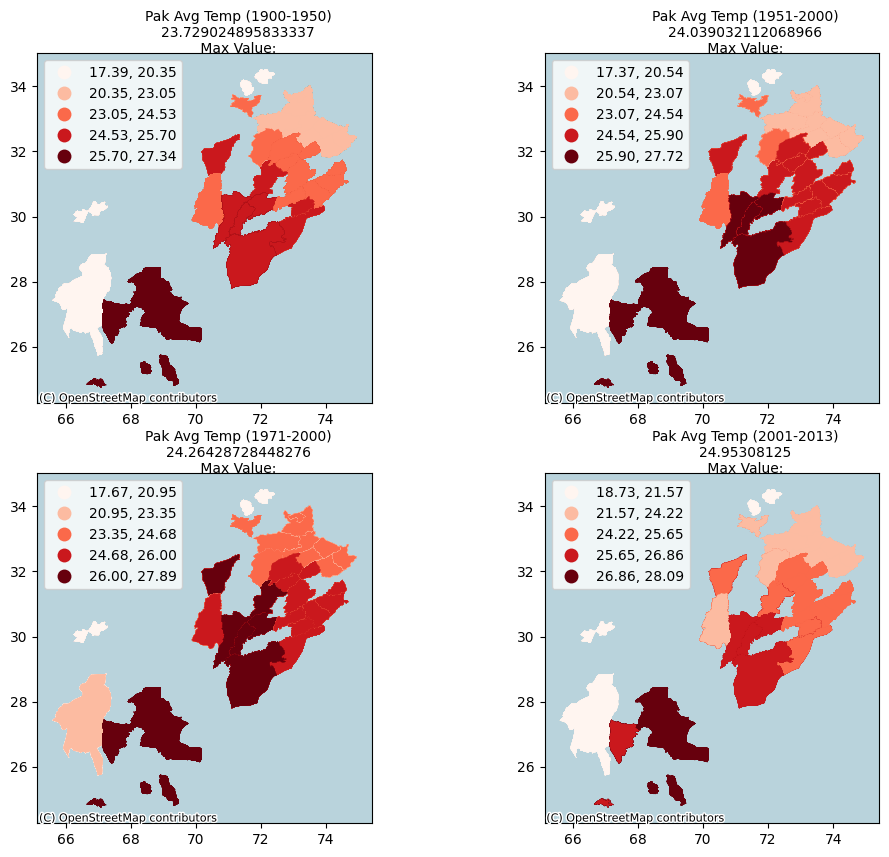

In [284]:
f,ax = plt.subplots(2,2, figsize = (12,10))
plots = [ (pk_avg_temp_1900_1940, ax[0][0]), (pk_avg_temp_1941_1970, ax[0][1]),(pk_avg_temp_1971_2000, ax[1][0]), (pk_avg_temp_2001_2013, ax[1][1])]
i=1
for plot, axis in plots:
    plot.plot(ax=axis, column="AverageTemperature", cmap="Reds",scheme="FisherJenks", k= 5, legend= "true",legend_kwds={"loc": 2},)
    mean = plot['AverageTemperature'].mean()
    max_t = plot['AverageTemperature'].max()
    if(i==1):
        annotation_text = "Pak Avg Temp (1900-1950)\n" + str(mean) +"\n Max Value: "
    elif(i ==2):
        annotation_text = "Pak Avg Temp (1951-2000)\n" + str(mean) +"\n Max Value: "

    elif(i ==3):
        annotation_text = "Pak Avg Temp (1971-2000)\n" + str(mean) +"\n Max Value: "

    elif(i ==4): 
        annotation_text = "Pak Avg Temp (2001-2013)\n" + str(mean) +"\n Max Value: "
    i = i+1
    axis.annotate(annotation_text, xy=(0.60, 1.0), xycoords='axes fraction', ha='center')
    cx.add_basemap(ax=axis, crs = plot.crs,source=cx.providers.OpenStreetMap.DE)


- Plotting Pakistani Temp Mean from 1971-2000 and 2001-2013: (For Poster)

In [290]:
# f,ax = plt.subplots(1,2, figsize = (12,10))
# plots = [ (pk_avg_temp_1971_2000, ax[0]), (pk_avg_temp_2001_2013, ax[1])]
# i=1
# for plot, axis in plots:
#     plot.plot(ax=axis, column="AverageTemperature", cmap="Reds",scheme="FisherJenks", k= 5, legend= "true",legend_kwds={"loc": 2},)
#     mean = plot['AverageTemperature'].mean()
#     max_t = plot['AverageTemperature'].max()
#     if(i ==1):
#         annotation_text = "Pak Avg Temp (1971-2000)\n" + str(mean)

#     elif(i ==2): 
#         annotation_text = "Pak Avg Temp (2001-2013)\n" + str(mean)
#     i = i+1
#     axis.annotate(annotation_text, xy=(0.60, 1.0), xycoords='axes fraction', ha='center')
#     cx.add_basemap(ax=axis, crs = plot.crs,source=cx.providers.OpenStreetMap.DE)


- Finding out Auto Corelation

In [ ]:
# Generate W from the GeoDataFrame
w = weights.KNN.from_dataframe(pk_avg_temp_2001_2013, k=4)
# Row-standardization
w.transform = "R"

pk_avg_temp_2001_2013["AverageTemperatureLag"] = weights.spatial_lag.lag_spatial(
    w, pk_avg_temp_2001_2013["AverageTemperature"]
)

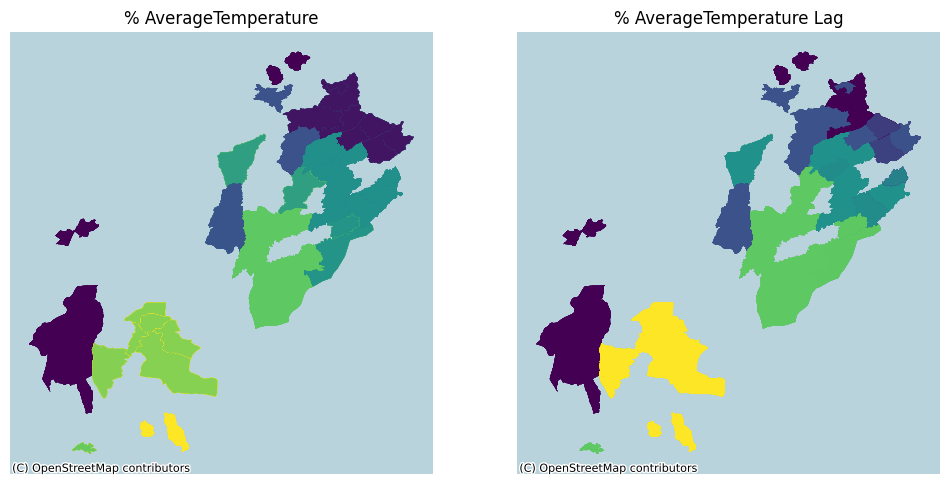

In [ ]:
f, axs = plt.subplots(1, 2, figsize=(12, 6))
ax1, ax2 = axs
pk_avg_temp_2001_2013.plot(
    column="AverageTemperature",
    cmap="viridis",
    scheme="quantiles",
    k=5,
    edgecolor="white",
    linewidth=0.0,
    alpha=0.75,
    # legend=True,
    ax=ax1,
)
ax1.set_axis_off()
ax1.set_title("% AverageTemperature")
cx.add_basemap(ax=ax1, crs = plot.crs,source=cx.providers.OpenStreetMap.DE)



pk_avg_temp_2001_2013.plot(
    column="AverageTemperatureLag",
    cmap="viridis",
    scheme="quantiles",
    k=5,
    edgecolor="white",
    linewidth=0.0,
    alpha=0.75,
    # legend=True,
    ax=ax2,
)
ax2.set_axis_off()
ax2.set_title("% AverageTemperature Lag")
cx.add_basemap(ax=ax2, crs = plot.crs,source=cx.providers.OpenStreetMap.DE)


plt.show()

In [ ]:
from pysal.explore import esda

w.transform = "R"
moran = esda.moran.Moran(pk_avg_temp_2001_2013["AverageTemperature"], w)
print("Pakistan Score: ",moran.I)

Pakistan Score:  0.9833283752744735


- The Avg temperature of Pakistan shows a very strong auto corelation, indicates that the cities with same temperatures lie together

## India Analysis

India is another Global Warming affected country, lets take a deep look and analyse its temperature trends 

- Taking out India Temperature

In [ ]:
india_temp = global_warm_countries.loc[global_warm_countries["Country"] == "India"]

- Computing the Average Temp for Indian Cities, also generating a new DataFrame with the aggregated data

In [ ]:
india_avg_temp = india_temp.groupby(['years', 'City']).agg({'AverageTemperature':'mean'}).reset_index()

In [ ]:
india_avg_temp.head()

,years,City,AverageTemperature
0,1796,Achalpur,25.608000
1,1796,Adilabad,26.951833
2,1796,Adoni,26.904417
3,1796,Agartala,24.787333
4,1796,Agra,25.050833


- Reading the Indian Districts Shapefile

In [ ]:
india_shape_file = gp.read_file("India_Shapefiles/india_ds.shp")

In [ ]:
india_shape_file.head()

,DST_ID,DISTRICT,STATE,geometry
0,1,Gilgit,JAMMU AND KASHMIR,"POLYGON ((74.30254 35.65012, 73.84581 35.82461..."
1,2,Kargil,JAMMU AND KASHMIR,"POLYGON ((74.89890 35.62939, 75.04768 35.77413..."
2,3,Ladakh,JAMMU AND KASHMIR,"POLYGON ((75.98059 35.93823, 76.16165 35.91142..."
3,4,Chilas,JAMMU AND KASHMIR,"POLYGON ((73.27244 35.81596, 73.32610 35.79237..."
4,5,Kupwara,JAMMU AND KASHMIR,"POLYGON ((74.30254 35.65012, 74.54015 35.50695..."


- Adjusting the shapefile cities with the temperature dataset cities

In [ ]:
india_districts = india_shape_file[["DISTRICT", "geometry"]]
india_districts = india_districts.loc[(india_shape_file["DISTRICT"].isin(india_avg_temp["City"].unique()))]
india_districts = india_districts.rename(columns={"DISTRICT": "City"})

- Merging into a single dataset

In [ ]:
india_geoms = india_avg_temp.merge(india_districts, on=["City"], how = "right")
india_geoms = gp.GeoDataFrame(india_geoms, geometry = india_geoms["geometry"])

- Taking out the range

In [ ]:
india_avg_temp_1900_1940 = change_years_range(1900,1940,india_geoms) 
india_avg_temp_1941_1970 = change_years_range(1941,1970,india_geoms)
india_avg_temp_1971_2000 = change_years_range(1971,2000,india_geoms)
india_avg_temp_2001_2013 = change_years_range(2001,2013,india_geoms) 

- Plotting Indian Temp Mean from 1900-1940, 1941-1970, 1971-2000 and 2001-2013:

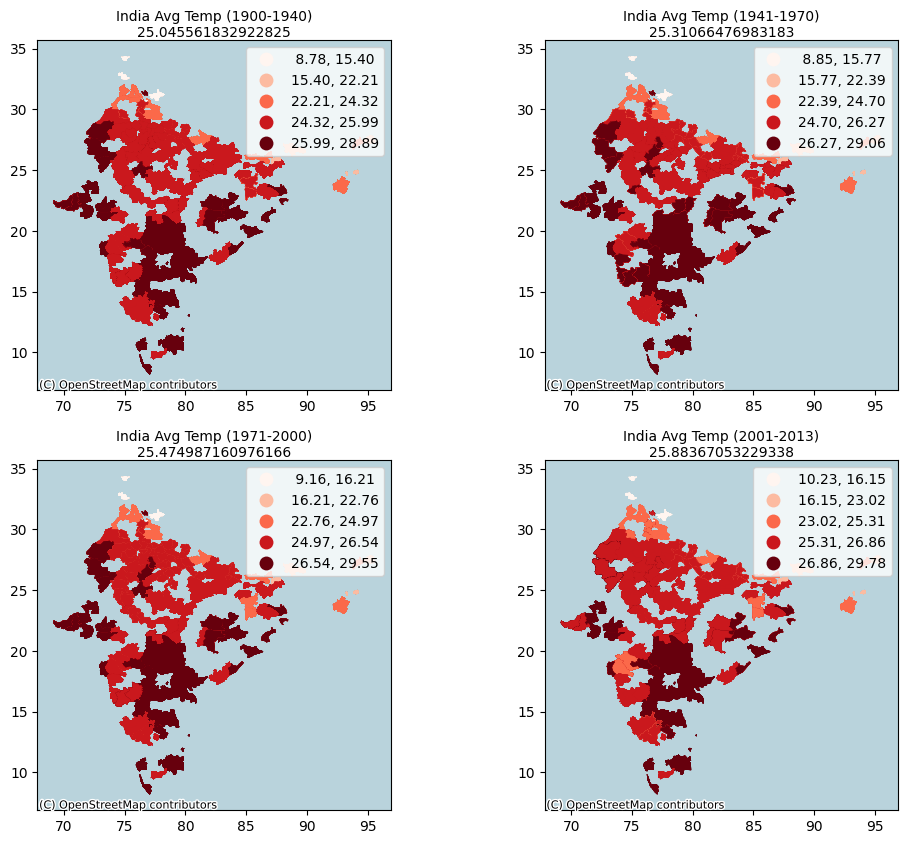

In [ ]:
f,ax = plt.subplots(2,2, figsize = (12,10))
plots = [ (india_avg_temp_1900_1940, ax[0][0]), (india_avg_temp_1941_1970, ax[0][1]),(india_avg_temp_1971_2000, ax[1][0]), (india_avg_temp_2001_2013, ax[1][1])]
i=1
for plot, axis in plots:
    plot.plot(ax=axis, column="AverageTemperature", cmap="Reds",scheme="FisherJenks", k= 5, legend= "true",legend_kwds={"loc": 1},)
    mean = plot['AverageTemperature'].mean()
    if(i==1):
        annotation_text = "India Avg Temp (1900-1940)\n" + str(mean) 
    elif(i ==2):
        annotation_text = "India Avg Temp (1941-1970)\n" + str(mean) 

    elif(i ==3):
        annotation_text = "India Avg Temp (1971-2000)\n" + str(mean) 

    elif(i ==4): 
        annotation_text = "India Avg Temp (2001-2013)\n" + str(mean) 
    i = i+1
    axis.annotate(annotation_text, xy=(0.5, 1.01), xycoords='axes fraction', ha='center')
    cx.add_basemap(ax=axis, crs = plot.crs, source=cx.providers.OpenStreetMap.DE)

- Plotting Indian Temp Mean from 1971-2000 and 2001-2013: (For Poster)

In [289]:
# f,ax = plt.subplots(1,2, figsize = (12,10))
# plots = [ (india_avg_temp_1971_2000, ax[0]), (india_avg_temp_2001_2013, ax[1])]
# i=1
# for plot, axis in plots:
#     plot.plot(ax=axis, column="AverageTemperature", cmap="Reds",scheme="FisherJenks", k= 5, legend= "true",legend_kwds={"loc": 1},)
#     mean = plot['AverageTemperature'].mean()
#     if(i ==1):
#         annotation_text = "India Avg Temp (1971-2000)\n" + str(mean) 

#     elif(i ==2): 
#         annotation_text = "India Avg Temp (2001-2013)\n" + str(mean) 
#     i = i+1
#     axis.annotate(annotation_text, xy=(0.5, 1.01), xycoords='axes fraction', ha='center')
#     cx.add_basemap(ax=axis, crs = plot.crs, source=cx.providers.OpenStreetMap.DE)

- Finding Auto Co-relation

In [ ]:
# Generate W from the GeoDataFrame
w = weights.KNN.from_dataframe(india_avg_temp_2001_2013, k=4)
# Row-standardization
w.transform = "R"

india_avg_temp_2001_2013["AverageTemperatureLag"] = weights.spatial_lag.lag_spatial(
    w, india_avg_temp_2001_2013["AverageTemperature"]
)

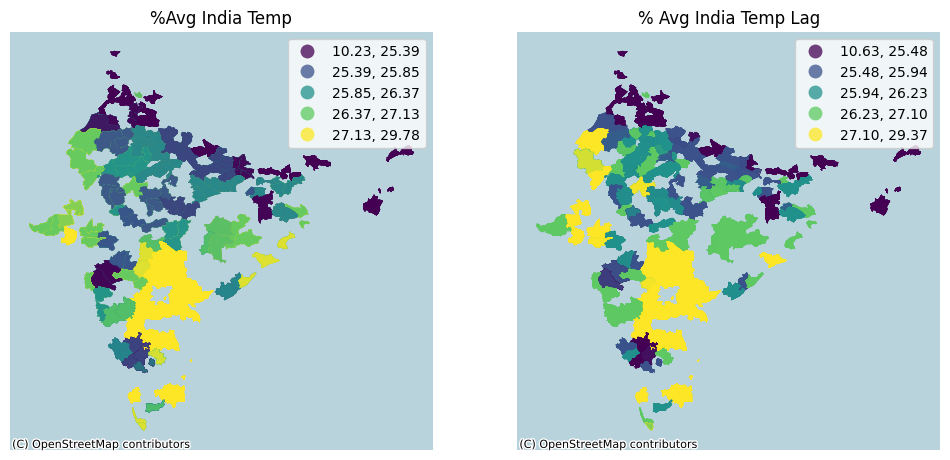

In [280]:
f, axs = plt.subplots(1, 2, figsize=(12, 6))
ax1, ax2 = axs
india_avg_temp_2001_2013.plot(
    column="AverageTemperature",
    cmap="viridis",
    scheme="quantiles",
    k=5,
    edgecolor="white",
    linewidth=0.0,
    alpha=0.75,
    legend=True,
    ax=ax1,
)
ax1.set_axis_off()
ax1.set_title("%Avg India Temp")
cx.add_basemap(
    ax1,
    crs=india_avg_temp_2001_2013.crs,
     source=cx.providers.OpenStreetMap.DE
)


india_avg_temp_2001_2013.plot(
    column="AverageTemperatureLag",
    cmap="viridis",
    scheme="quantiles",
    k=5,
    edgecolor="white",
    linewidth=0.0,
    alpha=0.75,
    legend=True,
    ax=ax2,
)
ax2.set_axis_off()
ax2.set_title("% Avg India Temp Lag")
cx.add_basemap(
    ax2,
    crs=india_avg_temp_2001_2013.crs,
    source=cx.providers.OpenStreetMap.DE
)

plt.show()

In [ ]:
w.transform = "R"
moran = esda.moran.Moran(india_avg_temp_2001_2013["AverageTemperature"], w)
print("India Score: ",moran.I)

India Score:  0.9793311758217875


- Global Warming is affected India at a very rapid rate, the way it has arised from 2000 - 2013

- The average temperature in India has a high degree of autocorrelation, suggesting that cities with similar temperatures are clustered together.

# CONLUSION

In my project, I firstly examined the average temperatures of the world and then My job was to identify whether global warming is occuring or not, 
I identified the primary contributor to global warming (USA) through CO2 emissions and examined its temperature trends and anaylsed its auto corlation.
Then I selected two countries that have been significantly impacted by global warming, despite not being major contributors to it, analyzed the temperature trends for both nations.
I observed a high degree of auto-correlation in temperature across the globe, indicating that areas with similar temperatures tend to be located near each other.
My analysis revealed a significant rise in temperature for both countries, highlighting the urgent need to take immediate and effective action to mitigate the effects of global warming. 
In the absence of such measures, the world will face numerous disasters and severe consequences in the future.